In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps
import numpy

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
X_train[2345]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  22, 183, 236,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 162, 252, 147,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   4, 136, 251, 247,  47,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 139, 252, 252, 119,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[2345]

6

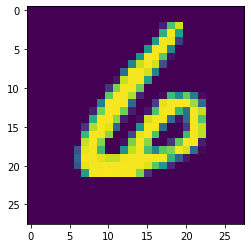

In [ ]:
plt.imshow(X_train[2345])


In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [ ]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [ ]:
Y_train[2345]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 202s 107ms/step - loss: 0.1878 - accuracy: 0.9546 - val_loss: 0.0766 - val_accuracy: 0.9760
Epoch 2/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.0651 - accuracy: 0.9802 - val_loss: 0.0753 - val_accuracy: 0.9776
Epoch 3/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.0443 - accuracy: 0.9861 - val_loss: 0.0909 - val_accuracy: 0.9757
Epoch 4/5
1875/1875 [==============================] - 194s 104ms/step - loss: 0.0357 - accuracy: 0.9888 - val_loss: 0.1030 - val_accuracy: 0.9764
Epoch 5/5
1875/1875 [==============================] - 194s 104ms/step - loss: 0.0274 - accuracy: 0.9913 - val_loss: 0.1330 - val_accuracy: 0.9733


In [ ]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.13301759958267212, 0.9732999801635742]


In [ ]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 95ms/step
[[2.54362666e-13 1.16115720e-24 4.18503621e-10 4.73483863e-10
  1.74469432e-23 1.40236614e-16 1.41292741e-25 1.00000000e+00
  2.59354395e-16 1.04449240e-12]
 [1.59409519e-12 8.86234360e-17 1.00000000e+00 1.08378315e-11
  1.52109661e-19 3.05510637e-21 7.10675225e-13 1.23514888e-18
  8.41517979e-19 1.57027298e-20]
 [6.02908223e-10 9.99978542e-01 1.86670168e-05 1.70294134e-09
  6.94075254e-07 4.58379361e-08 8.07797051e-07 4.10770884e-09
  1.32751563e-06 2.06527284e-09]
 [9.99995470e-01 8.88864940e-16 3.07005810e-10 5.82073105e-12
  1.01750205e-11 3.74563526e-13 4.14413444e-06 1.01946993e-11
  2.25080964e-15 3.20657279e-07]]


In [ ]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
model.save("model.h5")

In [ ]:
model=load_model("model.h5")